In [21]:
import torch
from tqdm.notebook import tqdm
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Load the data from CSV
df = pd.read_csv("Final_AllReview.csv")

In [22]:
replacement_mapping = {'Positive': 'Positive', 'Positive': 'Positive', 'Positive': 'positive', "Negative": "Negative", "Positive" : "positive", "Positive":"positive" }
df['Sentiment Label'] = df['Sentiment Label'].str.strip()

# Replace values in the DataFrame column in place
df['Sentiment Label'].replace(replacement_mapping, inplace=True)

In [23]:
# Using conditional logic
df['label'] = df['Sentiment Label'].apply(lambda x: 1 if x == 'positive' else 0)


In [24]:
# Assuming df is your DataFrame
average_vote = df['vote'].mean()
print("Average Vote:", average_vote)


Average Vote: 10.178350926110337


In [25]:
import pandas as pd

# Assuming df is your DataFrame
df['helpfulness_label'] = df['vote'].apply(lambda x: 1 if x > 5 else 0)


## Modeling

In [26]:
from sklearn.model_selection import train_test_split

# Assuming df contains all your features and labels
# Preprocess your features and labels as needed

# Define X (input features) and y (target labels)
X = df.loc[:, 'BertE1':'BertE768'].values 
y_label = df['label'].values  # Assuming 'label' is the column name for the label task
y_helpfulness_label = df['helpfulness_label'].values  # Assuming 'helpfulness_label' is the column name for the helpfulness label task

# Split data into training, validation, and test sets
X_train, X_temp, y_train_label, y_temp_label, y_train_helpfulness_label, y_temp_helpfulness_label = train_test_split(X, y_label, y_helpfulness_label, test_size=0.2, random_state=42)
X_val, X_test, y_val_label, y_test_label, y_val_helpfulness_label, y_test_helpfulness_label = train_test_split(X_temp, y_temp_label, y_temp_helpfulness_label, test_size=0.25, random_state=42)


In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import log_loss, roc_auc_score, accuracy_score

# Train Random Forest for the main label task
random_forest_label = RandomForestClassifier(n_estimators=20, random_state=42)
random_forest_label.fit(X_train, y_train_label)

# Train Random Forest for the helpfulness label task
random_forest_helpfulness_label = RandomForestClassifier(n_estimators=20, random_state=42)
random_forest_helpfulness_label.fit(X_train, y_train_helpfulness_label)

# Predictions on the validation set for main label task
y_pred_val_label = random_forest_label.predict(X_val)

# Predictions on the validation set for helpfulness label task
y_pred_val_helpfulness_label = random_forest_helpfulness_label.predict(X_val)

# Predictions on the test set for main label task
y_pred_test_label = random_forest_label.predict(X_test)

# Predictions on the test set for helpfulness label task
y_pred_test_helpfulness_label = random_forest_helpfulness_label.predict(X_test)


# Print classification report for main label task on test set
print("Classification Report for Sentiment Label Task on Validation Set:")
print(classification_report(y_val_label, y_pred_val_label))

# Probability predictions for log loss and AUC
prob_pred_label = random_forest_label.predict_proba(X_val)

# Log Loss
log_loss_label = log_loss(y_val_label, prob_pred_label)
print("Log Loss:", log_loss_label)

# AUC
auc_label = roc_auc_score(y_val_label, prob_pred_label[:, 1])  # consider the probability of the positive class
print("AUC:", auc_label)

# Accuracy
accuracy_label = accuracy_score(y_val_label, y_pred_val_label)
print("Accuracy:", accuracy_label)


# Print classification report for helpfulness label task on test set
print("\nClassification Report for Helpfulness Label Task on Validation Set:")
print(classification_report(y_val_helpfulness_label, y_pred_val_helpfulness_label))

# For Helpfulness Label Task
# Probability predictions for log loss and AUC
prob_pred_helpfulness = random_forest_helpfulness_label.predict_proba(X_val)

# Log Loss
log_loss_helpfulness = log_loss(y_val_helpfulness_label, prob_pred_helpfulness)
print("Log Loss:", log_loss_helpfulness)

# AUC
auc_helpfulness = roc_auc_score(y_val_helpfulness_label, prob_pred_helpfulness[:, 1])
print("AUC:", auc_helpfulness)

# Accuracy
accuracy_helpfulness = accuracy_score(y_val_helpfulness_label, y_pred_val_helpfulness_label)
print("Accuracy:", accuracy_helpfulness)

# Print classification report for helpfulness label task on test set
print("\nClassification Report for Helpfulness Label Task on Test Set:")
print(classification_report(y_test_helpfulness_label, y_pred_test_helpfulness_label))

# For Helpfulness Label Task
# Probability predictions for log loss and AUC
prob_pred_helpfulness = random_forest_helpfulness_label.predict_proba(X_test)

# Log Loss
log_loss_helpfulness = log_loss(y_test_helpfulness_label, prob_pred_helpfulness)
print("Log Loss:", log_loss_helpfulness)

# AUC
auc_helpfulness = roc_auc_score(y_test_helpfulness_label, prob_pred_helpfulness[:, 1])
print("AUC:", auc_helpfulness)

# Accuracy
accuracy_helpfulness = accuracy_score(y_test_helpfulness_label, y_pred_test_helpfulness_label)
print("Accuracy:", accuracy_helpfulness)

Classification Report for Sentiment Label Task on Validation Set:
              precision    recall  f1-score   support

           0       0.78      0.23      0.35       298
           1       0.84      0.98      0.91      1208

    accuracy                           0.83      1506
   macro avg       0.81      0.61      0.63      1506
weighted avg       0.83      0.83      0.80      1506

Log Loss: 0.44736451809143607
AUC: 0.8058399817769679
Accuracy: 0.8346613545816733

Classification Report for Helpfulness Label Task on Validation Set:
              precision    recall  f1-score   support

           0       0.78      0.91      0.84      1036
           1       0.67      0.42      0.52       470

    accuracy                           0.76      1506
   macro avg       0.72      0.66      0.68      1506
weighted avg       0.74      0.76      0.74      1506

Log Loss: 0.5860945931695236
AUC: 0.7808387414770392
Accuracy: 0.7556440903054449

Classification Report for Helpfulness Label T

In [28]:
# Function to plot confusion matrix
def plot_confusion_matrix(cm, classes, title='Confusion Matrix'):
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(title)
    plt.colorbar()
    ticks = np.arange(len(classes))
    plt.xticks(ticks, classes, rotation=45)
    plt.yticks(ticks, classes)
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.grid(False)
    
# Compute confusion matrices
cm_label = confusion_matrix(y_test_label, y_pred_test_label)
cm_helpfulness_label = confusion_matrix(y_test_helpfulness_label, y_pred_test_helpfulness_label)

In [29]:
# Function to plot ROC curve
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')  # Dashed diagonal
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate (Recall)')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    
# Compute ROC curve and AUC for each class
fpr_label, tpr_label, _ = roc_curve(y_test_label, random_forest_label.predict_proba(X_test)[:, 1])
roc_auc_label = auc(fpr_label, tpr_label)

fpr_helpfulness, tpr_helpfulness, _ = roc_curve(y_test_helpfulness_label, random_forest_helpfulness_label.predict_proba(X_test)[:, 1])
roc_auc_helpfulness = auc(fpr_helpfulness, tpr_helpfulness)


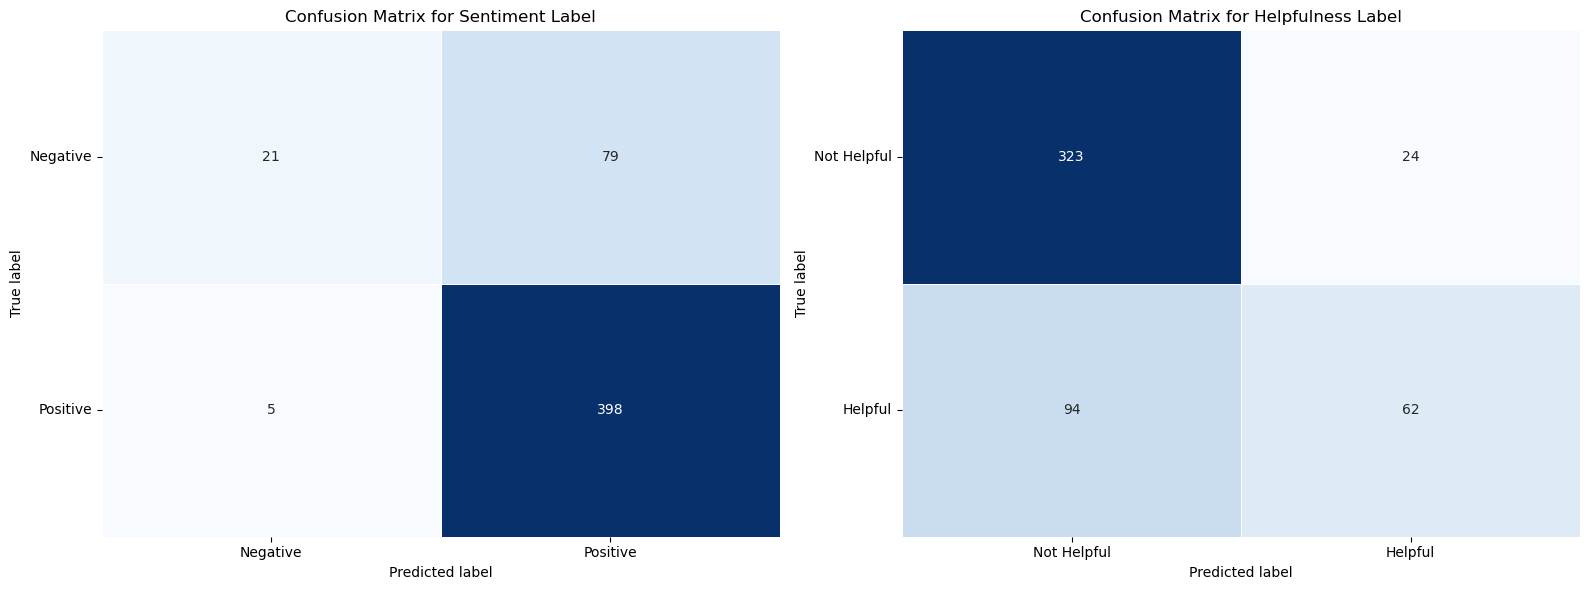

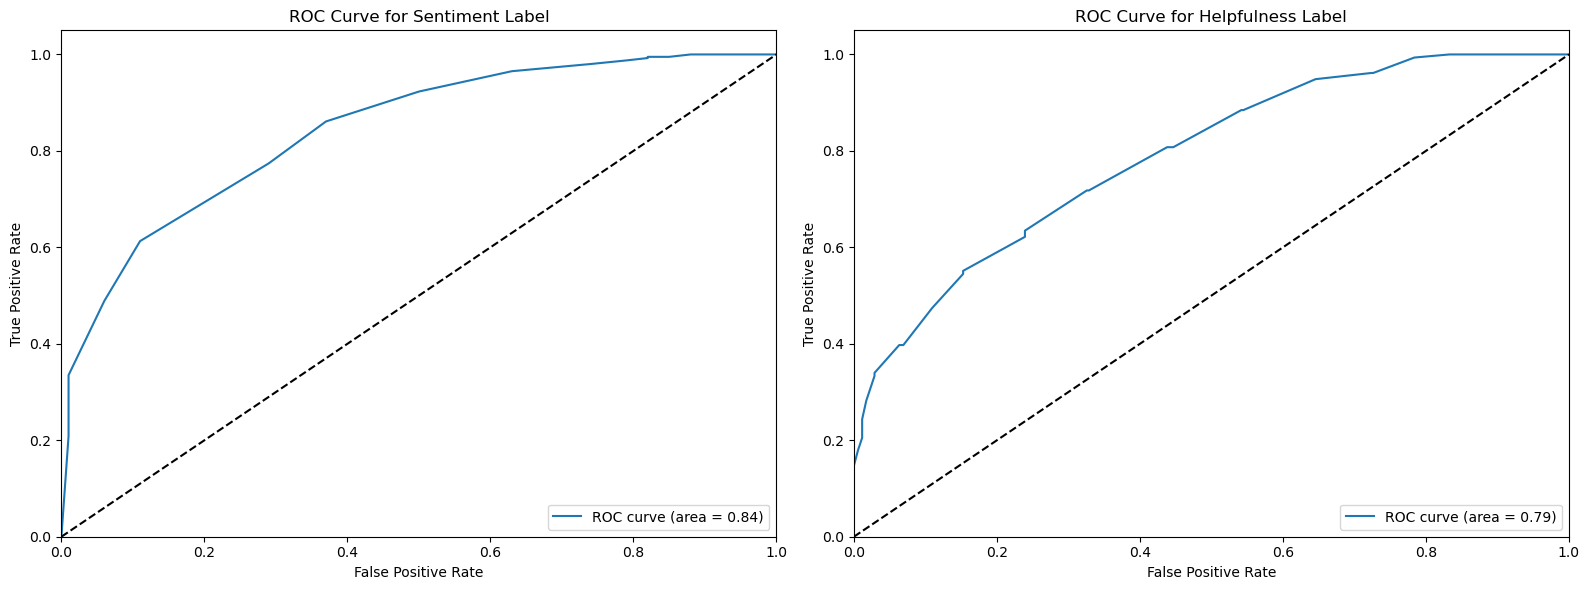

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc

# Assuming you have computed cm_label, cm_helpfulness_label, fpr_label, tpr_label, roc_auc_label, fpr_helpfulness, tpr_helpfulness, roc_auc_helpfulness

# Plotting Confusion Matrices
plt.figure(figsize=(16, 6))

# Confusion Matrix for Sentiment Label
plt.subplot(121)
sns.heatmap(cm_label, annot=True, fmt="d", linewidths=.5, cmap="Blues", cbar=False)
plt.title('Confusion Matrix for Sentiment Label')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.xticks([0.5, 1.5], ['Negative', 'Positive'], rotation=0)
plt.yticks([0.5, 1.5], ['Negative', 'Positive'], rotation=0, va="center")

# Confusion Matrix for Helpfulness Label
plt.subplot(122)
sns.heatmap(cm_helpfulness_label, annot=True, fmt="d", linewidths=.5, cmap="Blues", cbar=False)
plt.title('Confusion Matrix for Helpfulness Label')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.xticks([0.5, 1.5], ['Not Helpful', 'Helpful'], rotation=0)
plt.yticks([0.5, 1.5], ['Not Helpful', 'Helpful'], rotation=0, va="center")

plt.tight_layout()
plt.savefig('bconfusion_matrices.png', dpi=300)  # Save the figure to a file
plt.show()

# Plotting ROC Curves
plt.figure(figsize=(16, 6))

plt.subplot(121)
plt.plot(fpr_label, tpr_label, label=f'ROC curve (area = {roc_auc_label:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Sentiment Label')
plt.legend(loc="lower right")

plt.subplot(122)
plt.plot(fpr_helpfulness, tpr_helpfulness, label=f'ROC curve (area = {roc_auc_helpfulness:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Helpfulness Label')
plt.legend(loc="lower right")

plt.tight_layout()
plt.savefig('broc_curves.png', dpi=300)  # Save the figure to a file
plt.show()

In [28]:
### stratified splitting

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight

# Split data into training, validation, and test sets with stratified sampling
X_train, X_temp, y_train_label, y_temp_label, y_train_helpfulness_label, y_temp_helpfulness_label = train_test_split(X, y_label, y_helpfulness_label, test_size=0.2, stratify=y_label, random_state=42)
X_val, X_test, y_val_label, y_test_label, y_val_helpfulness_label, y_test_helpfulness_label = train_test_split(X_temp, y_temp_label, y_temp_helpfulness_label, test_size=0.25, stratify=y_temp_label, random_state=42)

# Compute class weights for the label task
class_weights_label = compute_class_weight('balanced', classes=np.unique(y_train_label), y=y_train_label)
class_weight_dict_label = dict(zip(np.unique(y_train_label), class_weights_label))

# Compute class weights for the helpfulness label task
class_weights_helpfulness_label = compute_class_weight('balanced', classes=np.unique(y_train_helpfulness_label), y=y_train_helpfulness_label)
class_weight_dict_helpfulness_label = dict(zip(np.unique(y_train_helpfulness_label), class_weights_helpfulness_label))


In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Train Random Forest for the main label task with class weights
random_forest_label = RandomForestClassifier(n_estimators=20, class_weight=class_weight_dict_label, random_state=42)
random_forest_label.fit(X_train, y_train_label)

# Train Random Forest for the helpfulness label task with class weights
random_forest_helpfulness_label = RandomForestClassifier(n_estimators=20, class_weight=class_weight_dict_helpfulness_label, random_state=42)
random_forest_helpfulness_label.fit(X_train, y_train_helpfulness_label)

# Predictions on the validation set for main label task
y_pred_val_label = random_forest_label.predict(X_val)

# Predictions on the validation set for helpfulness label task
y_pred_val_helpfulness_label = random_forest_helpfulness_label.predict(X_val)

# Predictions on the test set for main label task
y_pred_test_label = random_forest_label.predict(X_test)

# Predictions on the test set for helpfulness label task
y_pred_test_helpfulness_label = random_forest_helpfulness_label.predict(X_test)


# Print classification report for main label task on test set
print("Classification Report for Sentiment Label Task on Validation Set:")
print(classification_report(y_val_label, y_pred_val_label))

# Probability predictions for log loss and AUC
prob_pred_label = random_forest_label.predict_proba(X_val)

# Log Loss
log_loss_label = log_loss(y_val_label, prob_pred_label)
print("Log Loss:", log_loss_label)

# AUC
auc_label = roc_auc_score(y_val_label, prob_pred_label[:, 1])  # consider the probability of the positive class
print("AUC:", auc_label)

# Accuracy
accuracy_label = accuracy_score(y_val_label, y_pred_val_label)
print("Accuracy:", accuracy_label)


# Print classification report for helpfulness label task on test set
print("\nClassification Report for Helpfulness Label Task on Validation Set:")
print(classification_report(y_val_helpfulness_label, y_pred_val_helpfulness_label))

# For Helpfulness Label Task
# Probability predictions for log loss and AUC
prob_pred_helpfulness = random_forest_helpfulness_label.predict_proba(X_val)

# Log Loss
log_loss_helpfulness = log_loss(y_val_helpfulness_label, prob_pred_helpfulness)
print("Log Loss:", log_loss_helpfulness)

# AUC
auc_helpfulness = roc_auc_score(y_val_helpfulness_label, prob_pred_helpfulness[:, 1])
print("AUC:", auc_helpfulness)

# Accuracy
accuracy_helpfulness = accuracy_score(y_val_helpfulness_label, y_pred_val_helpfulness_label)
print("Accuracy:", accuracy_helpfulness)

Classification Report for Sentiment Label Task on Validation Set:
              precision    recall  f1-score   support

           0       0.88      0.22      0.36       298
           1       0.84      0.99      0.91      1208

    accuracy                           0.84      1506
   macro avg       0.86      0.61      0.63      1506
weighted avg       0.85      0.84      0.80      1506

Log Loss: 0.45984662731807063
AUC: 0.8247963798391039
Accuracy: 0.8406374501992032

Classification Report for Helpfulness Label Task on Validation Set:
              precision    recall  f1-score   support

           0       0.78      0.91      0.84      1036
           1       0.69      0.43      0.53       470

    accuracy                           0.76      1506
   macro avg       0.73      0.67      0.68      1506
weighted avg       0.75      0.76      0.74      1506

Log Loss: 0.5595840134390728
AUC: 0.7854473014047482
Accuracy: 0.7602921646746348


In [33]:
# Compute confusion matrices for both tasks
cm_label = confusion_matrix(y_test_label, y_pred_test_label)
cm_helpfulness_label = confusion_matrix(y_test_helpfulness_label, y_pred_test_helpfulness_label)

In [34]:
# Compute ROC curve and AUC for Sentiment Label
fpr_label, tpr_label, _ = roc_curve(y_test_label, random_forest_label.predict_proba(X_test)[:, 1])
roc_auc_label = auc(fpr_label, tpr_label)

# Compute ROC curve and AUC for Helpfulness Label
fpr_helpfulness, tpr_helpfulness, _ = roc_curve(y_test_helpfulness_label, random_forest_helpfulness_label.predict_proba(X_test)[:, 1])
roc_auc_helpfulness = auc(fpr_helpfulness, tpr_helpfulness)

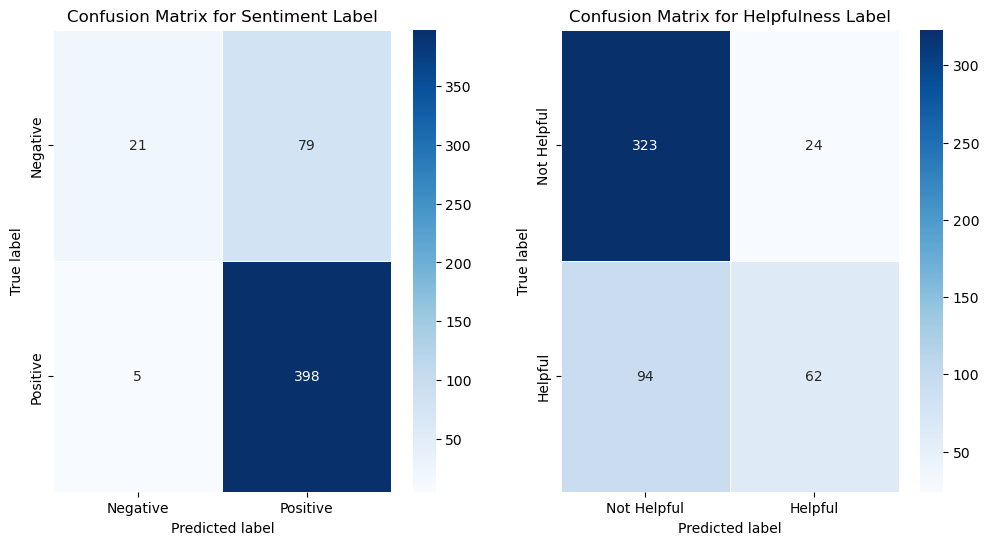

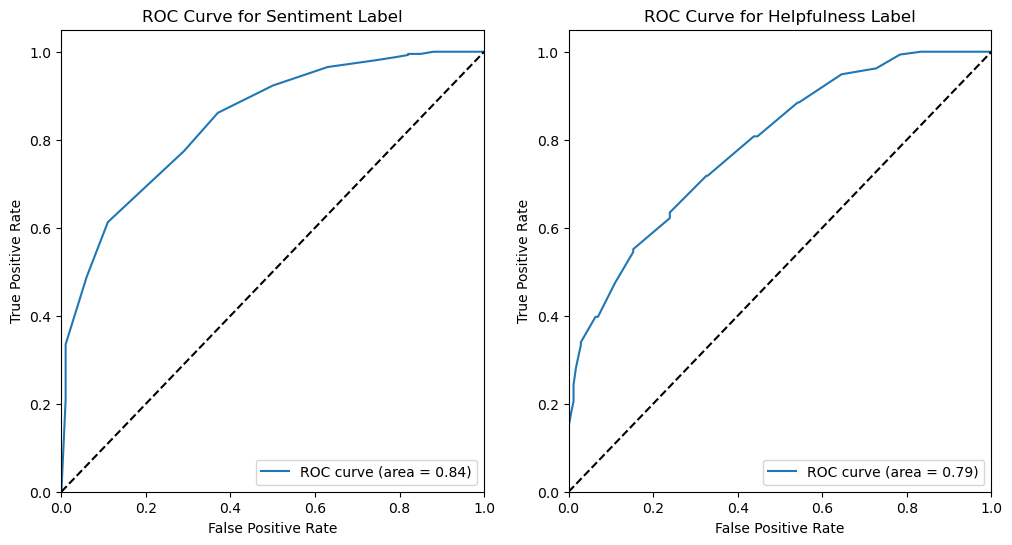

In [38]:
import seaborn as sns
# Plotting Confusion Matrix for Sentiment Label
plt.figure(figsize=(12, 6))
plt.subplot(121)
sns.heatmap(cm_label, annot=True, fmt="d", linewidths=.5, cmap="Blues")
plt.title('Confusion Matrix for Sentiment Label')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.xticks([0.5, 1.5], ['Negative', 'Positive'])
plt.yticks([0.5, 1.5], ['Negative', 'Positive'], va="center")

# Plotting Confusion Matrix for Helpfulness Label
plt.subplot(122)
sns.heatmap(cm_helpfulness_label, annot=True, fmt="d", linewidths=.5, cmap="Blues")
plt.title('Confusion Matrix for Helpfulness Label')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.xticks([0.5, 1.5], ['Not Helpful', 'Helpful'])
plt.yticks([0.5, 1.5], ['Not Helpful', 'Helpful'], va="center")
plt.savefig('bweightsconfusion_matrices.png', dpi=300)
plt.show()

# Plotting ROC Curves
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.plot(fpr_label, tpr_label, label='ROC curve (area = {:.2f})'.format(roc_auc_label))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Sentiment Label')
plt.legend(loc="lower right")

plt.subplot(122)
plt.plot(fpr_helpfulness, tpr_helpfulness, label='ROC curve (area = {:.2f})'.format(roc_auc_helpfulness))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Helpfulness Label')
plt.legend(loc="lower right")
plt.savefig('bweightsroc.png', dpi=300)
plt.show()

In [27]:
import torch
from tqdm.notebook import tqdm
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Load the data from CSV
df = pd.read_csv("Final_AllReview.csv")

In [28]:
replacement_mapping = {'Positive': 'Positive', 'Positive': 'Positive', 'Positive': 'positive', "Negative": "Negative", "Positive" : "positive", "Positive":"positive" }
df['Sentiment Label'] = df['Sentiment Label'].str.strip()

# Replace values in the DataFrame column in place
df['Sentiment Label'].replace(replacement_mapping, inplace=True)

In [29]:
# Using conditional logic
df['label'] = df['Sentiment Label'].apply(lambda x: 1 if x == 'positive' else 0)


In [30]:
# Assuming df is your DataFrame
average_vote = df['vote'].mean()
print("Average Vote:", average_vote)


Average Vote: 10.178350926110337


In [31]:
import pandas as pd

# Assuming df is your DataFrame
df['helpfulness_label'] = df['vote'].apply(lambda x: 1 if x > 5 else 0)


## Modeling

In [6]:
from sklearn.model_selection import train_test_split

# Assuming df contains all your features and labels
# Preprocess your features and labels as needed

# Define X (input features) and y (target labels)
X = df.loc[:, 'BertE1':'BertE768'].values 
y_label = df['label'].values  # Assuming 'label' is the column name for the label task
y_helpfulness_label = df['helpfulness_label'].values  # Assuming 'helpfulness_label' is the column name for the helpfulness label task

# Split data into training, validation, and test sets
X_train, X_temp, y_train_label, y_temp_label, y_train_helpfulness_label, y_temp_helpfulness_label = train_test_split(X, y_label, y_helpfulness_label, test_size=0.2, random_state=42)
X_val, X_test, y_val_label, y_test_label, y_val_helpfulness_label, y_test_helpfulness_label = train_test_split(X_temp, y_temp_label, y_temp_helpfulness_label, test_size=0.25, random_state=42)


In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import log_loss, roc_auc_score, accuracy_score

# Train Random Forest for the main label task
random_forest_label = RandomForestClassifier(n_estimators=20, random_state=42)
random_forest_label.fit(X_train, y_train_label)

# Train Random Forest for the helpfulness label task
random_forest_helpfulness_label = RandomForestClassifier(n_estimators=20, random_state=42)
random_forest_helpfulness_label.fit(X_train, y_train_helpfulness_label)

# Predictions on the validation set for main label task
y_pred_val_label = random_forest_label.predict(X_val)

# Predictions on the validation set for helpfulness label task
y_pred_val_helpfulness_label = random_forest_helpfulness_label.predict(X_val)

# Predictions on the test set for main label task
y_pred_test_label = random_forest_label.predict(X_test)

# Predictions on the test set for helpfulness label task
y_pred_test_helpfulness_label = random_forest_helpfulness_label.predict(X_test)

# Print classification report for main label task on test set
print("Classification Report for Sentiment Label Task on Validation Set:")
print(classification_report(y_val_label, y_pred_val_label))

# Probability predictions for log loss and AUC
prob_pred_label = random_forest_label.predict_proba(X_val)

# Log Loss
log_loss_label = log_loss(y_val_label, prob_pred_label)
print("Log Loss:", log_loss_label)

# AUC
auc_label = roc_auc_score(y_val_label, prob_pred_label[:, 1])  # consider the probability of the positive class
print("AUC:", auc_label)

# Accuracy
accuracy_label = accuracy_score(y_val_label, y_pred_val_label)
print("Accuracy:", accuracy_label)


# Print classification report for helpfulness label task on test set
print("\nClassification Report for Helpfulness Label Task on Validation Set:")
print(classification_report(y_test_helpfulness_label, y_pred_test_helpfulness_label))

# For Helpfulness Label Task
# Probability predictions for log loss and AUC
prob_pred_helpfulness = random_forest_helpfulness_label.predict_proba(X_val)

# Log Loss
log_loss_helpfulness = log_loss(y_val_helpfulness_label, prob_pred_helpfulness)
print("Log Loss:", log_loss_helpfulness)

# AUC
auc_helpfulness = roc_auc_score(y_val_helpfulness_label, prob_pred_helpfulness[:, 1])
print("AUC:", auc_helpfulness)

# Accuracy
accuracy_helpfulness = accuracy_score(y_val_helpfulness_label, y_pred_val_helpfulness_label)
print("Accuracy:", accuracy_helpfulness)


Classification Report for Sentiment Label Task on Validation Set:
              precision    recall  f1-score   support

           0       0.76      0.24      0.37       291
           1       0.84      0.98      0.91      1215

    accuracy                           0.84      1506
   macro avg       0.80      0.61      0.64      1506
weighted avg       0.83      0.84      0.80      1506

Log Loss: 0.4393837387257634
AUC: 0.8179005274843382
Accuracy: 0.8393094289508632

Classification Report for Helpfulness Label Task on Validation Set:
              precision    recall  f1-score   support

           0       0.78      0.89      0.83       347
           1       0.64      0.42      0.51       156

    accuracy                           0.75       503
   macro avg       0.71      0.66      0.67       503
weighted avg       0.73      0.75      0.73       503

Log Loss: 0.6240337010697524
AUC: 0.7696630102570696
Accuracy: 0.7324037184594954


In [9]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Define the hyperparameter distribution
param_dist = {
    'n_estimators': [10, 20, 50],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the RandomizedSearchCV object for the main label task
random_search_label = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_distributions=param_dist,
    n_iter=20,  # Number of parameter settings to try
    scoring='accuracy',
    cv=5,
    random_state=42
)

# Fit the random search to the main label data
random_search_label.fit(X_train, y_train_label)

# Get the best parameters and the best score for the main label task
best_params_label = random_search_label.best_params_
best_score_label = random_search_label.best_score_
print("Best Parameters for Sentiment Label Task:", best_params_label)
print("Best Score for Sentiment Label Task:", best_score_label)

# Initialize the RandomizedSearchCV object for the helpfulness label task
random_search_helpfulness = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_distributions=param_dist,
    n_iter=20,  # Number of parameter settings to try
    scoring='accuracy',
    cv=5,
    random_state=42
)

# Fit the random search to the helpfulness label data
random_search_helpfulness.fit(X_train, y_train_helpfulness_label)

# Get the best parameters and the best score for the helpfulness label task
best_params_helpfulness = random_search_helpfulness.best_params_
best_score_helpfulness = random_search_helpfulness.best_score_
print("Best Parameters for Helpfulness Label Task:", best_params_helpfulness)
print("Best Score for Helpfulness Label Task:", best_score_helpfulness)

Best Parameters for Sentiment Label Task: {'n_estimators': 20, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 20}
Best Score for Sentiment Label Task: 0.8331876961084793
Best Parameters for Helpfulness Label Task: {'n_estimators': 50, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': 20}
Best Score for Helpfulness Label Task: 0.7418120132886864


In [10]:
from sklearn.metrics import confusion_matrix, roc_curve, auc, classification_report
import matplotlib.pyplot as plt

# Best models from random search
best_model_label = random_search_label.best_estimator_
best_model_helpfulness = random_search_helpfulness.best_estimator_

# Predictions on the test set using the best models
y_pred_test_label = best_model_label.predict(X_test)
y_pred_test_helpfulness_label = best_model_helpfulness.predict(X_test)

# Probabilities for ROC curve
y_proba_test_label = best_model_label.predict_proba(X_test)[:, 1]
y_proba_test_helpfulness_label = best_model_helpfulness.predict_proba(X_test)[:, 1]

# Confusion matrices
cm_label = confusion_matrix(y_test_label, y_pred_test_label)
cm_helpfulness_label = confusion_matrix(y_test_helpfulness_label, y_pred_test_helpfulness_label)

# ROC curve calculations
fpr_label, tpr_label, _ = roc_curve(y_test_label, y_proba_test_label)
roc_auc_label = auc(fpr_label, tpr_label)
fpr_helpfulness, tpr_helpfulness, _ = roc_curve(y_test_helpfulness_label, y_proba_test_helpfulness_label)
roc_auc_helpfulness = auc(fpr_helpfulness, tpr_helpfulness)

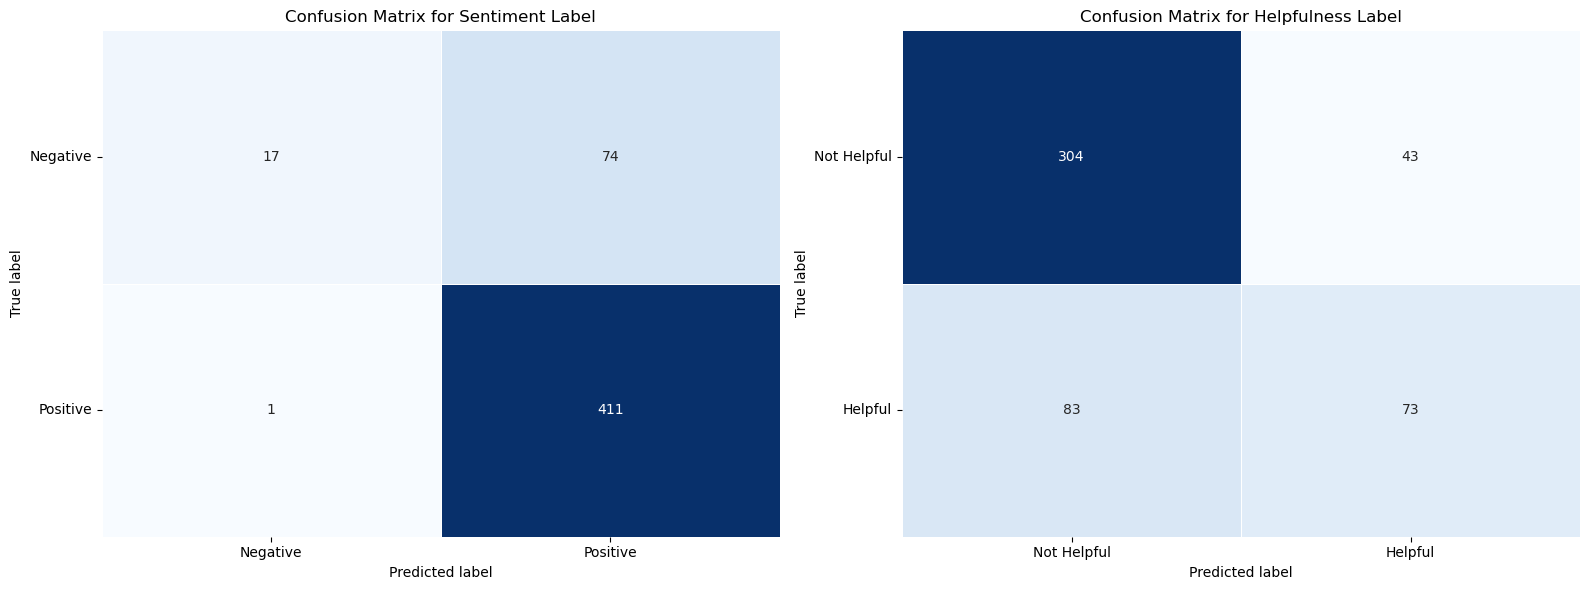

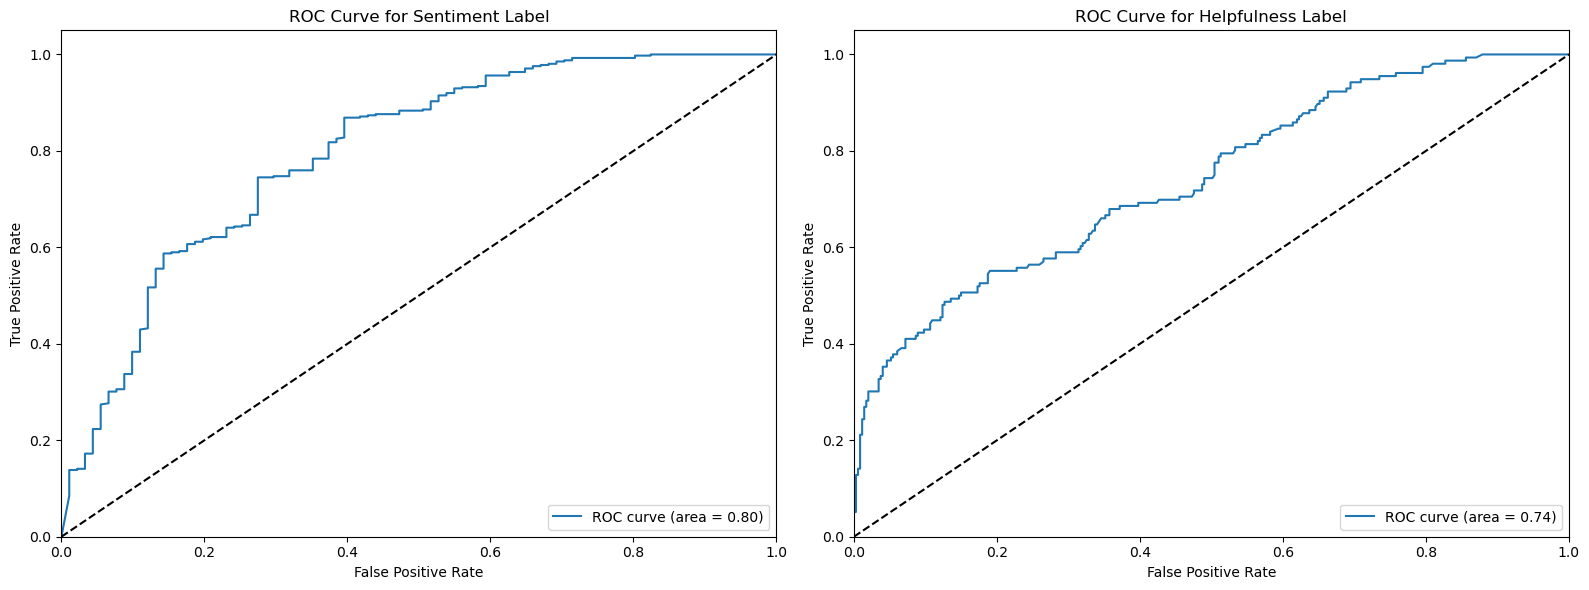

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc

# Assuming you have computed cm_label, cm_helpfulness_label, fpr_label, tpr_label, roc_auc_label, fpr_helpfulness, tpr_helpfulness, roc_auc_helpfulness

# Plotting Confusion Matrices
plt.figure(figsize=(16, 6))

# Confusion Matrix for Sentiment Label
plt.subplot(121)
sns.heatmap(cm_label, annot=True, fmt="d", linewidths=.5, cmap="Blues", cbar=False)
plt.title('Confusion Matrix for Sentiment Label')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.xticks([0.5, 1.5], ['Negative', 'Positive'], rotation=0)
plt.yticks([0.5, 1.5], ['Negative', 'Positive'], rotation=0, va="center")

# Confusion Matrix for Helpfulness Label
plt.subplot(122)
sns.heatmap(cm_helpfulness_label, annot=True, fmt="d", linewidths=.5, cmap="Blues", cbar=False)
plt.title('Confusion Matrix for Helpfulness Label')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.xticks([0.5, 1.5], ['Not Helpful', 'Helpful'], rotation=0)
plt.yticks([0.5, 1.5], ['Not Helpful', 'Helpful'], rotation=0, va="center")

plt.tight_layout()
plt.savefig('htconfusion_matrices.png', dpi=300)  # Save the figure to a file
plt.show()

# Plotting ROC Curves
plt.figure(figsize=(16, 6))

plt.subplot(121)
plt.plot(fpr_label, tpr_label, label=f'ROC curve (area = {roc_auc_label:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Sentiment Label')
plt.legend(loc="lower right")

plt.subplot(122)
plt.plot(fpr_helpfulness, tpr_helpfulness, label=f'ROC curve (area = {roc_auc_helpfulness:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Helpfulness Label')
plt.legend(loc="lower right")

plt.tight_layout()
plt.savefig('htroc_curves.png', dpi=300)  # Save the figure to a file
plt.show()

In [28]:
### stratified splitting

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight

# Split data into training, validation, and test sets with stratified sampling
X_train, X_temp, y_train_label, y_temp_label, y_train_helpfulness_label, y_temp_helpfulness_label = train_test_split(X, y_label, y_helpfulness_label, test_size=0.2, stratify=y_label, random_state=42)
X_val, X_test, y_val_label, y_test_label, y_val_helpfulness_label, y_test_helpfulness_label = train_test_split(X_temp, y_temp_label, y_temp_helpfulness_label, test_size=0.25, stratify=y_temp_label, random_state=42)

# Compute class weights for the label task
class_weights_label = compute_class_weight('balanced', classes=np.unique(y_train_label), y=y_train_label)
class_weight_dict_label = dict(zip(np.unique(y_train_label), class_weights_label))

# Compute class weights for the helpfulness label task
class_weights_helpfulness_label = compute_class_weight('balanced', classes=np.unique(y_train_helpfulness_label), y=y_train_helpfulness_label)
class_weight_dict_helpfulness_label = dict(zip(np.unique(y_train_helpfulness_label), class_weights_helpfulness_label))


In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, log_loss, roc_auc_score, accuracy_score

# Train Random Forest for the main label task
random_forest_label = RandomForestClassifier(n_estimators=20, random_state=42)
random_forest_label.fit(X_train, y_train_label)

# Train Random Forest for the helpfulness label task
random_forest_helpfulness_label = RandomForestClassifier(n_estimators=20, random_state=42)
random_forest_helpfulness_label.fit(X_train, y_train_helpfulness_label)

# Predictions on the validation set for main label task
y_pred_val_label = random_forest_label.predict(X_val)

# Predictions on the validation set for helpfulness label task
y_pred_val_helpfulness_label = random_forest_helpfulness_label.predict(X_val)

# Predictions on the test set for main label task
y_pred_test_label = random_forest_label.predict(X_test)

# Predictions on the test set for helpfulness label task
y_pred_test_helpfulness_label = random_forest_helpfulness_label.predict(X_test)

# Print classification report for main label task on validation set
print("Classification Report for Sentiment Label Task on Validation Set:")
print(classification_report(y_val_label, y_pred_val_label))

# Probability predictions for log loss and AUC on validation set
prob_pred_val_label = random_forest_label.predict_proba(X_val)

# Log Loss on validation set
log_loss_val_label = log_loss(y_val_label, prob_pred_val_label)
print("Log Loss:", log_loss_val_label)

# AUC on validation set
auc_val_label = roc_auc_score(y_val_label, prob_pred_val_label[:, 1])
print("AUC:", auc_val_label)

# Accuracy on validation set
accuracy_val_label = accuracy_score(y_val_label, y_pred_val_label)
print("Accuracy:", accuracy_val_label)

# Print classification report for main label task on test set
print("\nClassification Report for Sentiment Label Task on Test Set:")
print(classification_report(y_test_label, y_pred_test_label))

# Probability predictions for log loss and AUC on test set
prob_pred_test_label = random_forest_label.predict_proba(X_test)

# Log Loss on test set
log_loss_test_label = log_loss(y_test_label, prob_pred_test_label)
print("Log Loss:", log_loss_test_label)

# AUC on test set
auc_test_label = roc_auc_score(y_test_label, prob_pred_test_label[:, 1])
print("AUC:", auc_test_label)

# Accuracy on test set
accuracy_test_label = accuracy_score(y_test_label, y_pred_test_label)
print("Accuracy:", accuracy_test_label)

Classification Report for Sentiment Label Task on Validation Set:
              precision    recall  f1-score   support

           0       0.78      0.23      0.35       298
           1       0.84      0.98      0.91      1208

    accuracy                           0.83      1506
   macro avg       0.81      0.61      0.63      1506
weighted avg       0.83      0.83      0.80      1506

Log Loss: 0.44736451809143607
AUC: 0.8058399817769679
Accuracy: 0.8346613545816733

Classification Report for Sentiment Label Task on Test Set:
              precision    recall  f1-score   support

           0       0.74      0.23      0.35       100
           1       0.84      0.98      0.90       403

    accuracy                           0.83       503
   macro avg       0.79      0.61      0.63       503
weighted avg       0.82      0.83      0.79       503

Log Loss: 0.37860780533719257
AUC: 0.8006947890818858
Accuracy: 0.831013916500994


In [16]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

# Define the hyperparameter distribution
param_dist = {
    'n_estimators': [20, 50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Randomized Search for the main label task
random_search_weight_label = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_distributions=param_dist,
    n_iter=10,
    cv=5,
    scoring='accuracy',
    random_state=42
)

# Fit the randomized search model
random_search_weight_label.fit(X_train, y_train_label)

# Get the best parameters and the best score for the main label task
best_params_weight_label = random_search_weight_label.best_params_
best_score_weight_label = random_search_weight_label.best_score_
print("Best Parameters for Sentiment Label Task:", best_params_weight_label)
print("Best Score for Sentiment Label Task:", best_score_weight_label)


# Randomized Search for the helpfulness label task
random_search_weight_helpfulness = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_distributions=param_dist,
    n_iter=10,
    cv=5,
    scoring='accuracy',
    random_state=42
)

# Fit the randomized search model
random_search_weight_helpfulness.fit(X_train, y_train_helpfulness_label)

# Get the best parameters and the best score for the helpfulness label task
best_params_weight_helpfulness = random_search_weight_helpfulness.best_params_
best_score_weight_helpfulness = random_search_weight_helpfulness.best_score_
print("Best Parameters for Helpfulness Label Task:", best_params_weight_helpfulness)
print("Best Score for Helpfulness Label Task:", best_score_weight_helpfulness)

Best Parameters for Sentiment Label Task: {'n_estimators': 20, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_depth': None}
Best Score for Sentiment Label Task: 0.831693610069892
Best Parameters for Helpfulness Label Task: {'n_estimators': 50, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': None}
Best Score for Helpfulness Label Task: 0.7401951766129038


In [17]:
# Confusion matrices
cm_label = confusion_matrix(y_test_label, y_pred_test_label)
cm_helpfulness_label = confusion_matrix(y_test_helpfulness_label, y_pred_test_helpfulness_label)

In [18]:
# ROC Curves
fpr_label, tpr_label, _ = roc_curve(y_test_label, best_model_label.predict_proba(X_test)[:, 1])
roc_auc_label = auc(fpr_label, tpr_label)
fpr_helpfulness, tpr_helpfulness, _ = roc_curve(y_test_helpfulness_label, best_model_helpfulness.predict_proba(X_test)[:, 1])
roc_auc_helpfulness = auc(fpr_helpfulness, tpr_helpfulness)

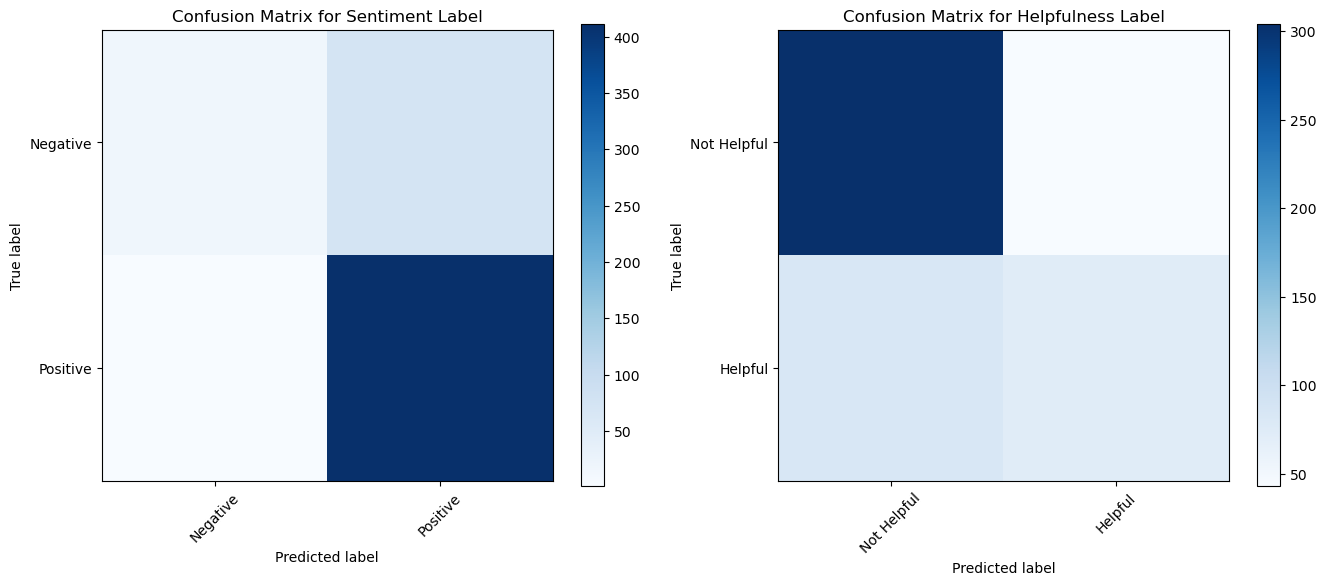

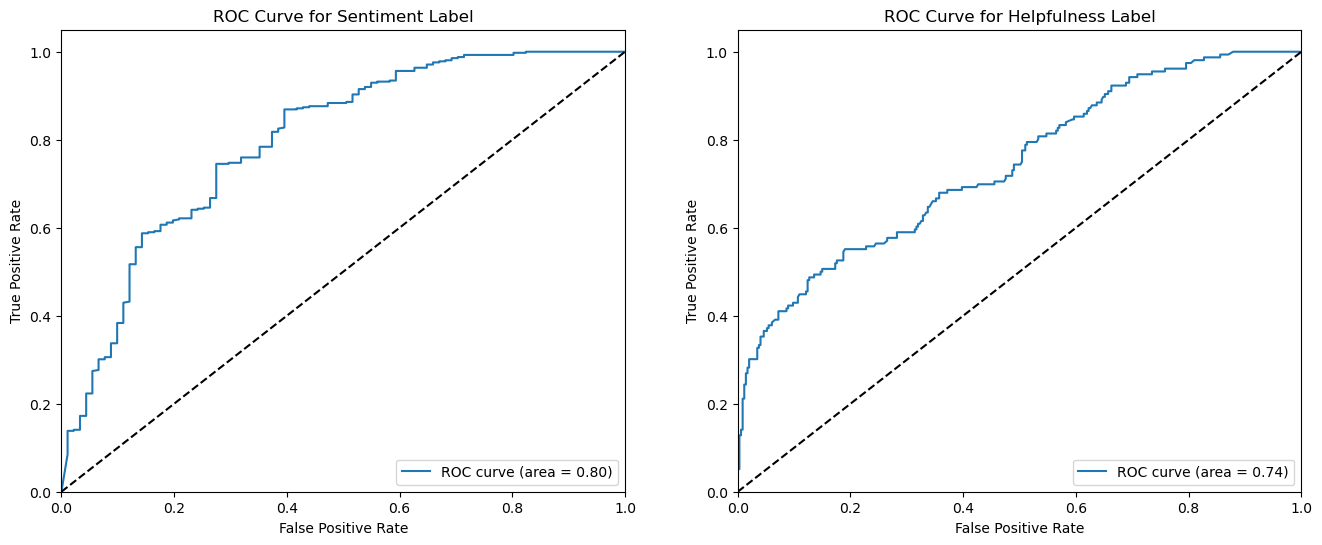

In [26]:
import seaborn as sns
# Plotting Confusion Matrix
plt.figure(figsize=(16, 6))
plt.subplot(121)
plt.imshow(cm_label, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Sentiment Label')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['Negative', 'Positive'], rotation=45)
plt.yticks(tick_marks, ['Negative', 'Positive'])
plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.subplot(122)
plt.imshow(cm_helpfulness_label, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Helpfulness Label')
plt.colorbar()
plt.xticks(tick_marks, ['Not Helpful', 'Helpful'], rotation=45)
plt.yticks(tick_marks, ['Not Helpful', 'Helpful'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.savefig('ht_weight_confusion_matrix.png', dpi=300)  # Save the figure to a file
plt.show()

# Plotting ROC Curves
plt.figure(figsize=(16, 6))
plt.subplot(121)
plt.plot(fpr_label, tpr_label, label='ROC curve (area = {:.2f})'.format(roc_auc_label))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Sentiment Label')
plt.legend(loc="lower right")

plt.subplot(122)
plt.plot(fpr_helpfulness, tpr_helpfulness, label='ROC curve (area = {:.2f})'.format(roc_auc_helpfulness))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Helpfulness Label')
plt.legend(loc="lower right")
plt.savefig('ht_weight_roc_curves.png', dpi=300)  # Save the figure to a file
plt.show()